In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

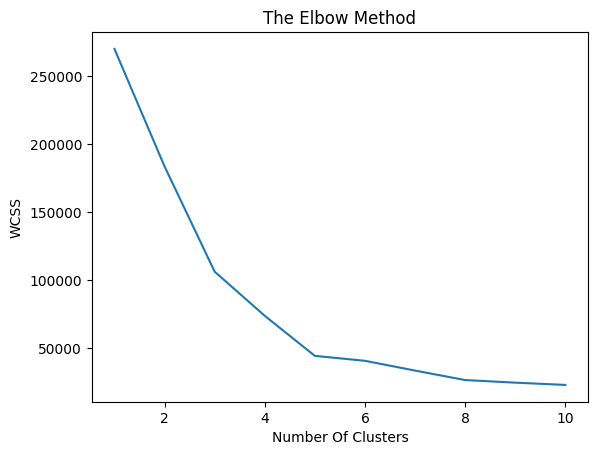

In [5]:
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [7]:
y_kmeans

array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 8, 6, 3, 6, 8,
       4, 8, 4, 3, 6, 8, 6, 3, 4, 8, 4, 3, 4, 3, 4, 8, 6, 8, 6, 3, 6, 8,
       6, 8, 8, 6, 6, 6, 0, 8, 0, 8, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 1, 2, 1,
       2, 5, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 9, 7, 9,
       7, 9])

In [8]:
supervised=pd.DataFrame(dataset)

In [9]:
supervised['Cluster_group']=y_kmeans

In [10]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,6
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,6
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,7
197,198,Male,32,126,74,9
198,199,Male,32,137,18,7


In [11]:
supervised.to_csv("cluster.csv",index=False)

In [12]:
centroids=kmeans.cluster_centers_

In [13]:
centroids

array([[ 56.46478873,  49.77464789],
       [ 97.09090909,  86.09090909],
       [ 79.        ,  16.59259259],
       [ 23.42857143,  84.78571429],
       [ 24.58333333,   9.58333333],
       [ 76.96      ,  80.8       ],
       [ 31.53333333,  35.86666667],
       [109.7       ,  22.        ],
       [ 33.5       ,  66.25      ],
       [127.66666667,  78.66666667]])

C:\Users\ELCOT\Anaconda3\envs\aimml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


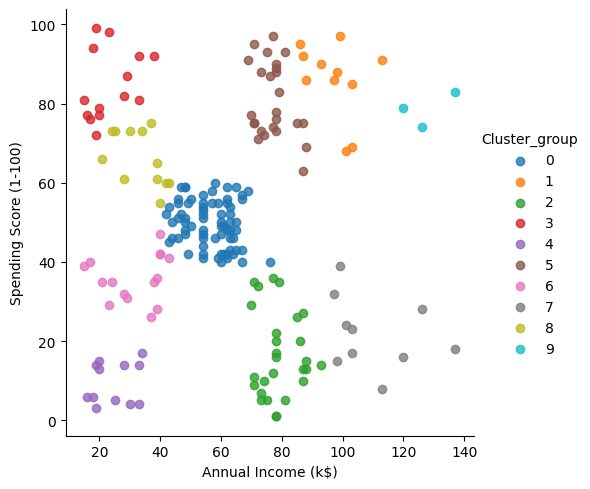

In [16]:
import seaborn as sns
supervised_columns = supervised.columns
facet=sns.lmplot(data=supervised,x=supervised_columns[3],y=supervised_columns[4],hue=supervised_columns[5],fit_reg=False,legend=True,legend_out=True)